<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [5]:
from bs4 import BeautifulSoup
import requests

# First, let's load the data.

file = 'job_listings.csv'
df = pd.read_csv(file, usecols=['title', 'description'])[['title', 'description']]
df.head()


,title,description
0,Data scientist,"b""<div><div>Job Requirements:</div><ul><li><p>..."
1,Data Scientist I,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...
2,Data Scientist - Entry Level,b'<div><p>As a Data Scientist you will be work...
3,Data Scientist,"b'<div class=""jobsearch-JobMetadataHeader icl-..."
4,Data Scientist,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...


In [7]:
from bs4 import BeautifulSoup

def clean_description(df):
    df = df.copy()
    df['description'] = df['description'].str.replace('b"', '')
    df['description'] = df['description'].str.replace("b'", '')
    df = df.applymap(lambda text: BeautifulSoup(text, 'html.parser').get_text())
    return df

df = clean_description(df)
df.head()

,title,description
0,Data scientist,Job Requirements:\nConceptual understanding in...
1,Data Scientist I,"Job Description\n\nAs a Data Scientist 1, you ..."
2,Data Scientist - Entry Level,As a Data Scientist you will be working on con...
3,Data Scientist,"$4,969 - $6,756 a monthContractUnder the gener..."
4,Data Scientist,Location: USA \xe2\x80\x93 multiple locations\...


In [8]:
# We're going to use regex to remove the unicode.

def remove_unicode(df):
    df = df.copy()
    df['description'] = df['description'].str.replace(r'(\\(x|n)[a-z0-9]{0,2})', ' ')
    return df

df = remove_unicode(df)
df.head()

,title,description
0,Data scientist,Job Requirements: Conceptual understanding in ...
1,Data Scientist I,"Job Description As a Data Scientist 1, you wi..."
2,Data Scientist - Entry Level,As a Data Scientist you will be working on con...
3,Data Scientist,"$4,969 - $6,756 a monthContractUnder the gener..."
4,Data Scientist,Location: USA multiple locations + years o...


In [9]:
# I'm going to check out a few of them to make sure everything is in order.

df.loc[10, 'description']

"Who We Are BlackThorn Therapeutics is a computational sciences company with capabilities to develop proprietary therapeutics focused on neurobehavioral disorders such as depression, schizophrenia, and autism. We have pioneered the development of a computational psychiatry platform to advance our robust pipeline of novel therapeutics. We leverage data-driven approaches to solve the patient selection problem to create treatments that improve patient outcomes.  The Position Help us create the next-gen AI technologies to make better decisions in end-to-end drug development, clinical trials, and deployment lifecycle. A successful candidate will develop and implement AI models and algorithms on large-scale, multimodal neuroimaging, physiological, and clinical datasets to deepen our understanding of neurobehavioral disorders and their treatment. You will work with scientists, clinical researchers, and software developers to implement solutions to support our data-driven approaches to improvi

In [10]:
df.loc[20, 'description']

"$45,000 a yearWorking under direction of the Associate Director for Decision Support Analytics, this position will utilize statistical software, visualization tools, and a variety of data sources (databases, files, ERP   s, etc.) to deliver solutions for members of the campus community. This position will collaborate with a variety of campus stakeholders to develop metrics, analyses, and visualizations to answer decision-making needs.  The University of Nebraska-Lincoln seeks to attract and retain a high performing and diverse workforce in which employees    differences are respected and valued to better meet the varying needs of the diverse populations we serve. The university fosters a diverse and inclusive work environment that promotes collaboration so that all individuals are able to participate and contribute to their full potential. As an EO/AA employer, qualified applicants are considered for employment without regard to race, color, ethnicity, national origin, sex, pregnancy,

## 2) Use Spacy to tokenize the listings 

In [11]:
# Let's define the stop words, omit data science.
nlp = spacy.load("en_core_web_lg")
stop_words = nlp.Defaults.stop_words.union(['data', 'science'])

# Tokenize it.
df['tokens'] = df['description'].apply(lambda x: [token.lemma_ for token in nlp(x) 
                                                  if (token not in stop_words)
                                                 and (token.is_punct !=True)])
df.sample(10)

,title,description,tokens
127,Associate Data Scientist,null Associate Data Scientist Ten-X Commer...,"[null, Associate, Data, Scientist, , ten, ..."
9,"Data Scientist, Lifecyle",Slack is hiring experienced data scientists to...,"[Slack, be, hire, experienced, datum, scientis..."
312,Undergraduate Internship/Co-op Program - Data ...,$21.93 - $26.43 an hourInternshipAs a Data Sci...,"[$, 21.93, $, 26.43, an, hourInternshipAs, a, ..."
379,Data Scientist,ClassDojo's vision is to create a modern educa...,"[ClassDojo, 's, vision, be, to, create, a, mod..."
159,Data Scientist,Experiment engineers will be expected to help ...,"[experiment, engineer, will, be, expect, to, h..."
357,Data Scientist (Multiple Levels),POSITION OBJECTIVE Data scientists interpret a...,"[POSITION, OBJECTIVE, Data, scientist, interpr..."
329,Metagenomics Data Scientist (Scientist I/II),Company Overview The complex ecosystem of bact...,"[company, Overview, the, complex, ecosystem, o..."
189,Data Scientist - Washington DC,Part-timeQxBranch is seeking a talented data s...,"[Part, timeQxBranch, be, seek, a, talented, da..."
217,Senior Business Intelligence Data Engineer,Senior Business Intelligence Data Engineer Roc...,"[Senior, Business, Intelligence, Data, Enginee..."
140,Data Scientist,*****Only local candidates will be consider fo...,"[only, local, candidate, will, be, consider, f..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [13]:
count_vect = CountVectorizer()

dtm = count_vect.fit_transform(df['description'])
dtm_df = pd.DataFrame(dtm.todense(), columns=count_vect.get_feature_names())
dtm_df.head()

,00,000,02115,03,0356,04,05,062,06366,08,...,zero,zeus,zf,zheng,zillow,zogsports,zones,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

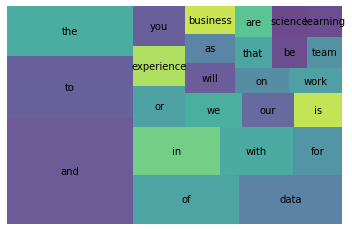

In [14]:
import squarify

word_ranks = dtm_df.sum().sort_values(ascending=False)
squarify.plot(sizes=word_ranks.values[:25], label=word_ranks.index[:25], alpha=0.8)
plt.axis('off')
plt.show();

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [15]:
# Instantiate vectorizor.

tfidf = TfidfVectorizer(stop_words = 'english')

dtm_tfidf = tfidf.fit_transform(df['description'])
dtm_tfidf_df = pd.DataFrame(dtm_tfidf.todense(), columns=tfidf.get_feature_names())

dtm_tfidf_df.head()

,00,000,02115,03,0356,04,05,062,06366,08,...,zero,zeus,zf,zheng,zillow,zogsports,zones,zoom,zuckerberg,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.106249,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [17]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM.
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm_tfidf_df)

# My ideal job description in Data Science.

job_desc = ["""
My ideal job would be working in the sports field. Recently in many sports, teams have been looking for ways to better analyze their players.
I have an interest in rational thinking, automation, data visualisation, machine learning, and association football. Recently in the football/soccer world,
clubs needed to see graphs & other visualizations to see how players were lacking in positions & where players excelled in their own clubs and in others
for transfers that they were interested in... therefore, I became interested in how people were behind the scenes displaying these graphs and how 
they got their stats. I would be extremely satisfied knowing that I was part of such a breakthrough in the new way of viewing the sport of football/soccer. 
"""]

In [18]:
query = tfidf.transform(job_desc)


In [19]:
query


<1x8477 sparse matrix of type '<class 'numpy.float64'>'
	with 38 stored elements in Compressed Sparse Row format>

In [20]:
# Use NN to find closest fit

nn.kneighbors(query.todense())

(array([[1.34564249, 1.35558612, 1.36086413, 1.36086413, 1.37037353]]),
 array([[185, 154, 156,  41, 388]], dtype=int64))

In [22]:
# Closest results.

df.loc[185]['description']

"Full-time Position  The Senior Data Scientist will be a skilled problem solver who has a passion for utilizing data to drive business decisions and interest in driving the sports industry forward. The position will involve working closely with the analytics and business intelligence teams for the planning, execution, and delivery of all KAGR analytics and data science products. Products may include a variety of predictive models, marketing analytics, forecasting, development of sales and business analytics, etc. Additionally, the Senior Data Scientist will be responsible for building new expertise within the Analytics & Data Science team through training and product R&D. The Company Kraft Analytics Group (KAGR) is technology and services company comprised of a brilliant group of data science and data analytics professionals who are at the top of their game in the sports and entertainment industry. This company is all about data-driven decision making that focuses on growing the bottom

In [27]:
# Closest results.

df.loc[154]['description']

"Job Description  Tasks: Reports to the BAT Architect to develop tools to model marketing attribution, growth, and fraud analysis models. Ships running code implementing these to Operations.  Skills & Experience: Experience in machine learning, quantitative analysis Experience in knowledge graphs, statistical relational learning, trends-driven analysis Experience in modelling both structured and unstructured data Excellent skills in C++, Python Excellent skills in Postgres Excellent skills in AWS, MapReduce Ability to work/report remotely  Bonus Points: Advanced degree in Mathematics or related Field'"

In [25]:
# Closest results.

df.loc[41]['description']

"Inscape (an Affiliate of VIZIO Inc.) is an industry leader in advertising solutions through automatic content recognition. We capture live viewing data from content sources across millions of Smart TVs and devices. Our comprehensive metrics deliver highly accurate, cross-platform viewing behavior. We enable advertisers and content producers with important insights that help them develop a deeper understanding of audiences, make more intelligent ad-buying decisions and be better prepared for changes in the market place. Inscape (an Affiliate of VIZIO Inc.) is an industry leader in advertising solutions through automatic content recognition. We capture live viewing data from content sources across millions of Smart TVs and devices. Our comprehensive metrics deliver highly accurate, cross-platform viewing behavior. We enable advertisers and content producers with important insights that help them develop a deeper understanding of audiences, make more intelligent ad-buying decisions and b

In [26]:
# Closest results.

df.loc[388]['description']

'POSITION SUMMARY Looking for opportunities to use cutting edge technologies analyzing petabytes of data in a world class Hadoop cluster, generating insights to guide consumers in their journey to wellness and help them achieve their health ambitions, whether its playing tackle football with their grandkids or running the Inca Trail Marathon? Aetnas Provider & Network Analytics team is focused on delivering strategically-impactful programs and tools to effectively partner with healthcare providers to help members across all life stages feel the joy of achieving their best health, in their own way.  Provides strategic leadership for the development, validation and delivery of algorithms, statistical models and reporting tools. Acts as the analytic team lead for highly complex projects involving multiple resources and tasks, providing individual mentoring in support of company objectives.  Fundamental Components: Leads development and execution of new and/or highly complex algorithms and

In [ ]:
# This is actually really cool. My first result was a pretty accurate description which made me excited for the future and what is ahead.

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 